In [349]:
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.preprocessing import StandardScaler # to standardise
from sklearn.model_selection import train_test_split # to split train and test set
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

#import xgboost
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import plot_importance  # to plot feature importance

# Install streamlit if not already installed
!pip install streamlit

# For deployment
import streamlit as st
import joblib
from sklearn.neural_network import MLPClassifier


Defaulting to user installation because normal site-packages is not writeable


In [350]:
df = pd.read_csv("project-data.csv", delimiter= ';')
df   # Loads the dataset into a pandas DataFrame for data manipulation

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69
1,no_disease,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82
613,cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71


In [351]:
df.shape

(615, 13)

In [352]:
df.columns

Index(['category', 'age', 'sex', 'albumin', 'alkaline_phosphatase',
       'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin',
       'cholinesterase', 'cholesterol', 'creatinina',
       'gamma_glutamyl_transferase ', 'protein   '],
      dtype='object')

# **Exploratory Data Analysis**

Filtering categorical data

In [353]:
df.dtypes[df.dtypes=='object']
#Although protein is numerical column but it is showing as object.

category      object
sex           object
protein       object
dtype: object

In [354]:
df.columns = df.columns.str.strip()  # Removes leading and trailing spaces

In [355]:
# Assuming 'protein' is indeed a valid column name
if 'protein' in df.columns:
    df['protein'] = pd.to_numeric(df['protein'], errors='coerce')
    df['protein'] = df['protein'].fillna(0).astype('float64')
    print(df['protein'].dtype)
else:
    print("The 'protein' column does not exist in the DataFrame.")

float64


In [356]:
df.dtypes[df.dtypes=='object']
# changed protein column from object to float

category    object
sex         object
dtype: object

Distribution of Numerical Features

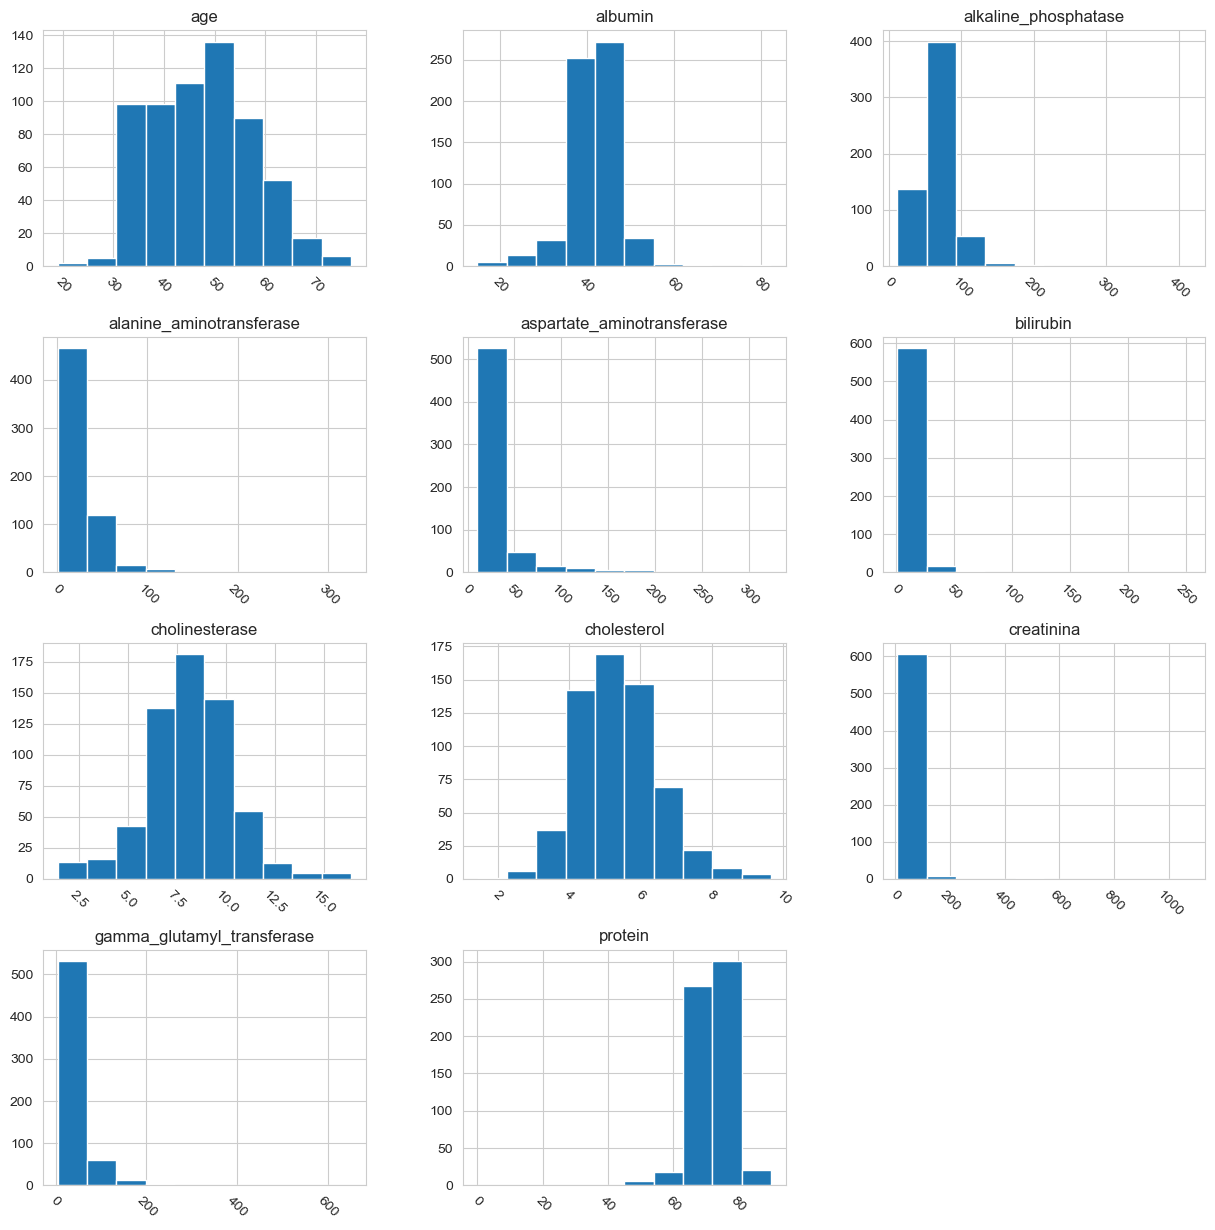

In [357]:
# Plot histogram grid
df.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

In [358]:
df.describe()
# Column alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase, bilirubin,creatinina and gamma_glutamyl_transferase have huge difference between mean and max values which clearly indicates the presence of outliers in these cloumns.

,age,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,615.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,71.926992
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,6.130297
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,0.000000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


Distribution of categorical data

In [359]:
df.describe(include=['object'])

,category,sex
count,615,615
unique,5,2
top,no_disease,m
freq,533,377


Bar plots for categorical Features

<Axes: xlabel='count', ylabel='sex'>

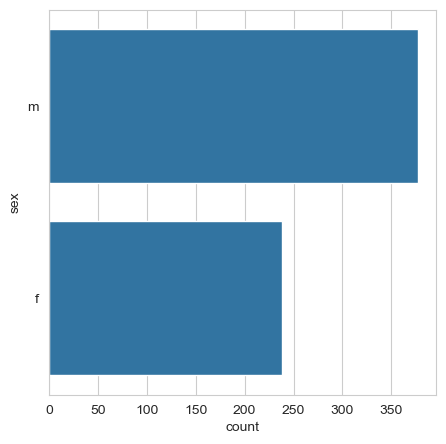

In [360]:
plt.figure(figsize=(5,5))
sns.countplot(y='sex', data=df)

In [361]:
df[df['sex'] == 'm'][['category', 'sex']].head()

,category,sex
0,no_disease,m
1,no_disease,m
2,no_disease,m
3,no_disease,m
4,no_disease,m


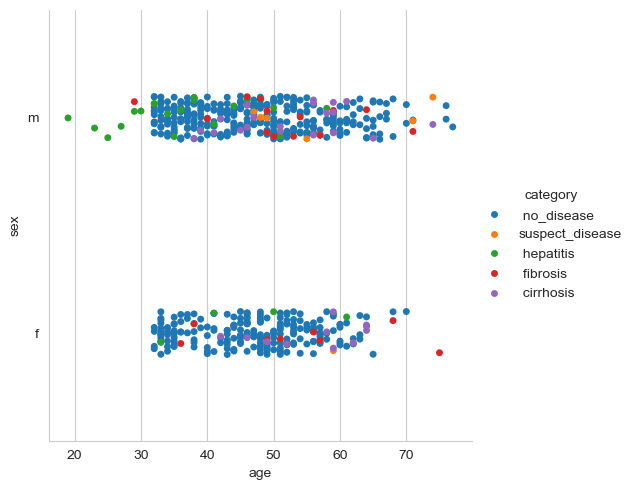

In [362]:
sns.catplot (x="age", y="sex", hue="category", data=df);
# Age seems to be factor for liver disease for both male and femlae.

Number of patients that are male:  377
Number of patients that are female:  238


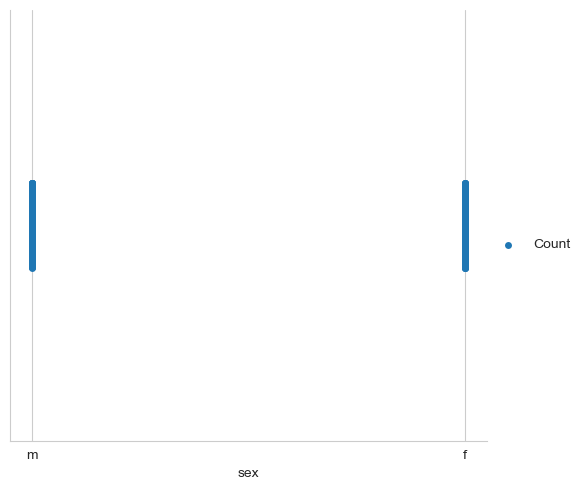

In [363]:
sns.catplot (data=df, x = 'sex', label='Count')

M, F = df['sex'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

There are more male patients than female patients

Label Male as 0 and Female as 1

In [364]:
## if score==negative, mark 0 ;else 1
def partition(x):
    if x =='m':
        return 0
    return 1

df['sex'] = df['sex'].map(partition)

2-D Scatter Plot

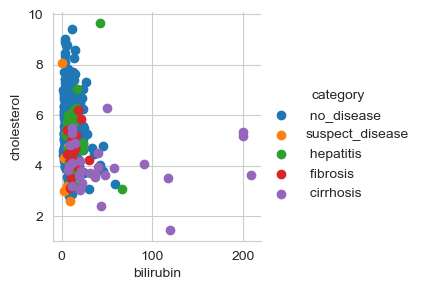

In [365]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'category').map(plt.scatter, 'bilirubin', 'cholesterol').add_legend()

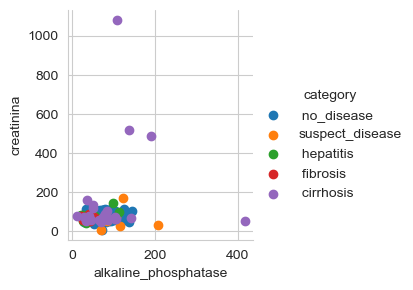

In [366]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'category').map(plt.scatter, 'alkaline_phosphatase', 'creatinina').add_legend()

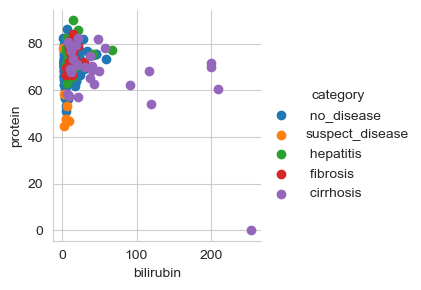

In [367]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'category').map(plt.scatter, 'bilirubin', 'protein').add_legend()

In [368]:
df.head(1)

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0


Correlations



*   Finally, let's take a look at the relationships between numeric features and other numeric features.List item
*   Correlation is a value between -1 and 1 that represents how closely values for two separate features move in unison.
*  Positive correlation means that as one feature increases, the other increases; eg. a child's age and her height.
*   Negative correlation means that as one feature increases, the other decreases; eg. hours spent studying and number of parties attended.

*   Correlations near -1 or 1 indicate a strong relationship.
*   Those closer to 0 indicate a weak relationship.

*  0 indicates no relationship.









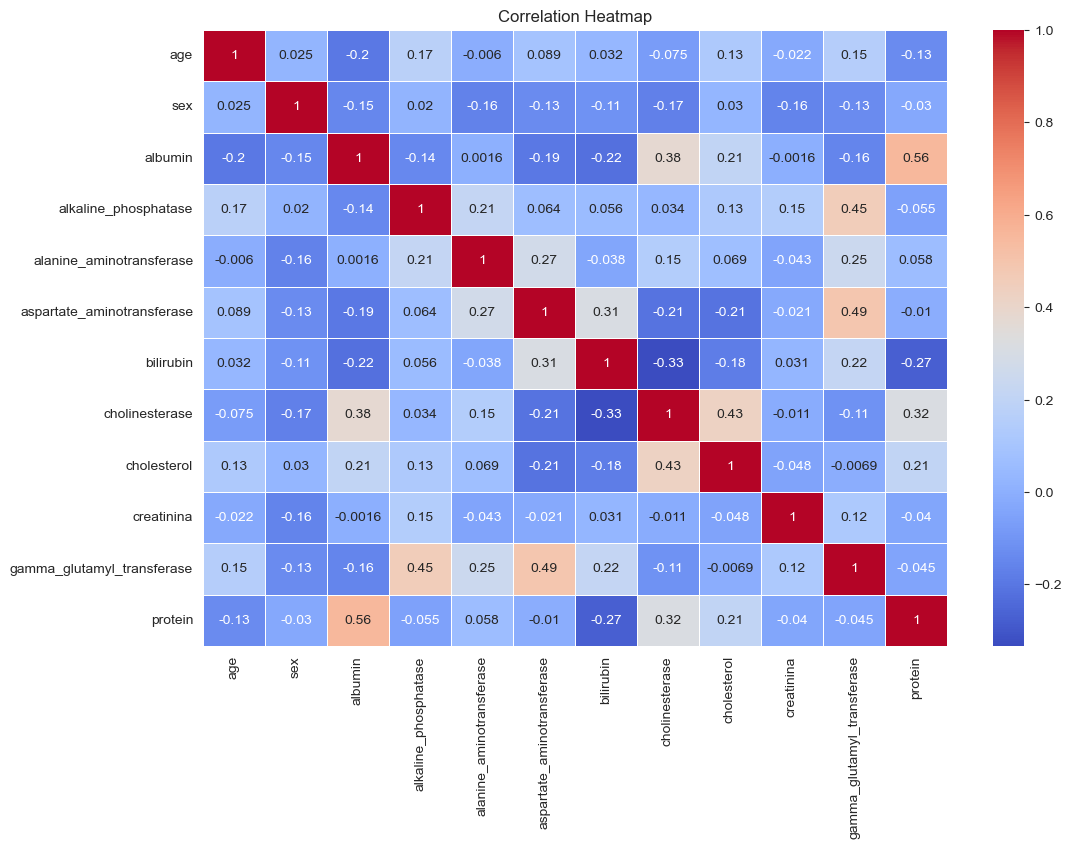

In [369]:
# Compute the correlation matrix for only the numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()  # Select only numeric columns
corr_matrix = df[numeric_columns].corr()  # Compute the correlation between numeric columns

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)  # Heatmap visualizes correlation between features; annot=True adds correlation values
plt.title("Correlation Heatmap")
plt.show()


In [370]:
df[numeric_columns].corr()

,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
age,1.000000,0.024544,-0.197498,0.173340,-0.006021,0.088666,0.032492,-0.075093,0.125641,-0.022296,0.153087,-0.132634
sex,0.024544,1.000000,-0.146140,0.019825,-0.161868,-0.130891,-0.111177,-0.169111,0.030208,-0.159589,-0.133276,-0.029935
albumin,-0.197498,-0.146140,1.000000,-0.141584,0.001606,-0.193450,-0.221651,0.375878,0.208248,-0.001573,-0.155749,0.556600
alkaline_phosphatase,0.173340,0.019825,-0.141584,1.000000,0.214480,0.063948,0.056078,0.033753,0.125429,0.149832,0.454630,-0.055109
alanine_aminotransferase,-0.006021,-0.161868,0.001606,0.214480,1.000000,0.273326,-0.038469,0.147000,0.068947,-0.043025,0.248114,0.057971
aspartate_aminotransferase,0.088666,-0.130891,-0.193450,0.063948,0.273326,1.000000,0.312231,-0.208536,-0.209970,-0.021387,0.491263,-0.010115
bilirubin,0.032492,-0.111177,-0.221651,0.056078,-0.038469,0.312231,1.000000,-0.333172,-0.180370,0.031224,0.217024,-0.272408
cholinesterase,-0.075093,-0.169111,0.375878,0.033753,0.147000,-0.208536,-0.333172,1.000000,0.425456,-0.011157,-0.110345,0.316459
cholesterol,0.125641,0.030208,0.208248,0.125429,0.068947,-0.209970,-0.180370,0.425456,1.000000,-0.047744,-0.006895,0.207071
creatinina,-0.022296,-0.159589,-0.001573,0.149832,-0.043025,-0.021387,0.031224,-0.011157,-0.047744,1.000000,0.121003,-0.040492


## **Data** Cleaning

In [371]:
df.shape

(615, 13)

In [372]:
df = df.drop_duplicates()
print( df.shape )
# No duplicates present

(615, 13)


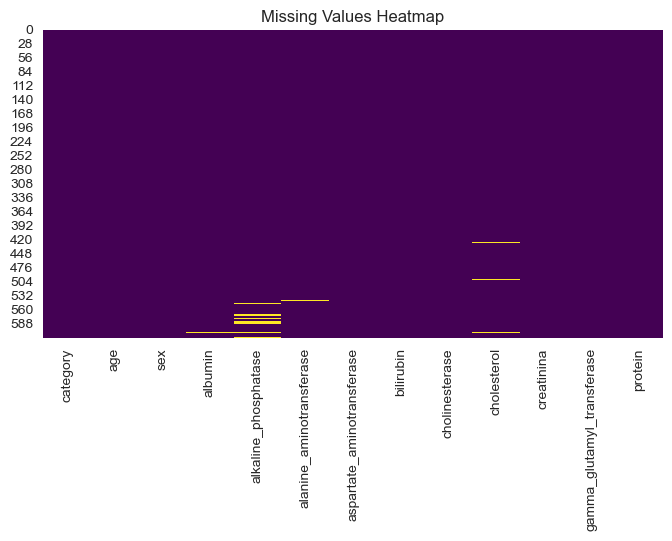

In [373]:
# Visualize missing values using a heatmap
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")  # Heatmap provides a visual of where missing values are located in the dataset
plt.title('Missing Values Heatmap')
plt.show()

In [374]:
# Fill missing values in numeric columns with the median of each column
numeric_columns = df.select_dtypes(include=[np.number]).columns  # Select numeric columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())  # Fill missing numeric values with median

# Verify if there are no more missing values
print(df.isnull().sum())  # Check that missing values have been filled

category                      0
age                           0
sex                           0
albumin                       0
alkaline_phosphatase          0
alanine_aminotransferase      0
aspartate_aminotransferase    0
bilirubin                     0
cholinesterase                0
cholesterol                   0
creatinina                    0
gamma_glutamyl_transferase    0
protein                       0
dtype: int64


Removing Outliers

<Axes: >

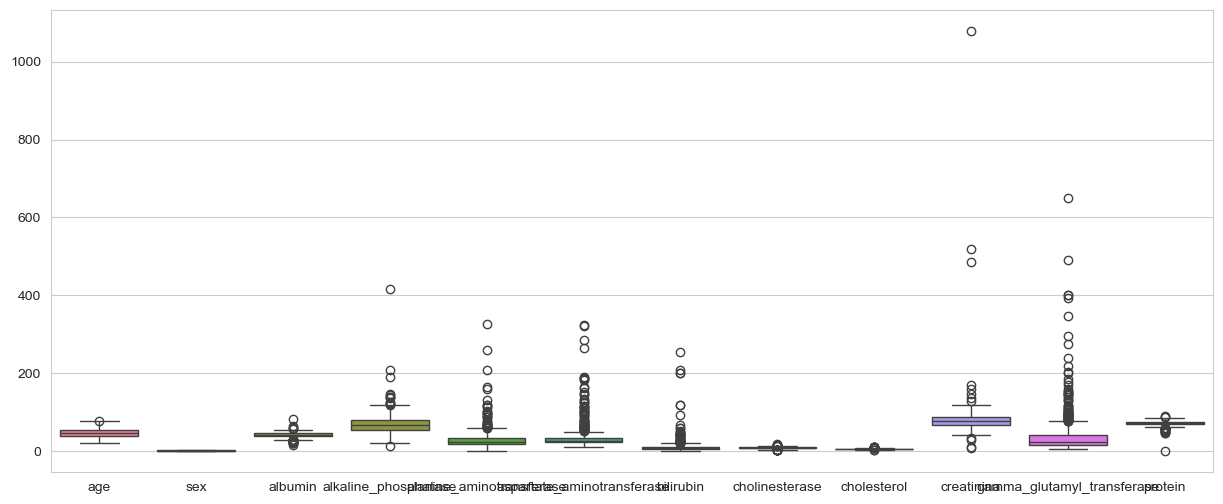

In [375]:
plt.figure(figsize=(15, 6))
sns.boxplot(df)

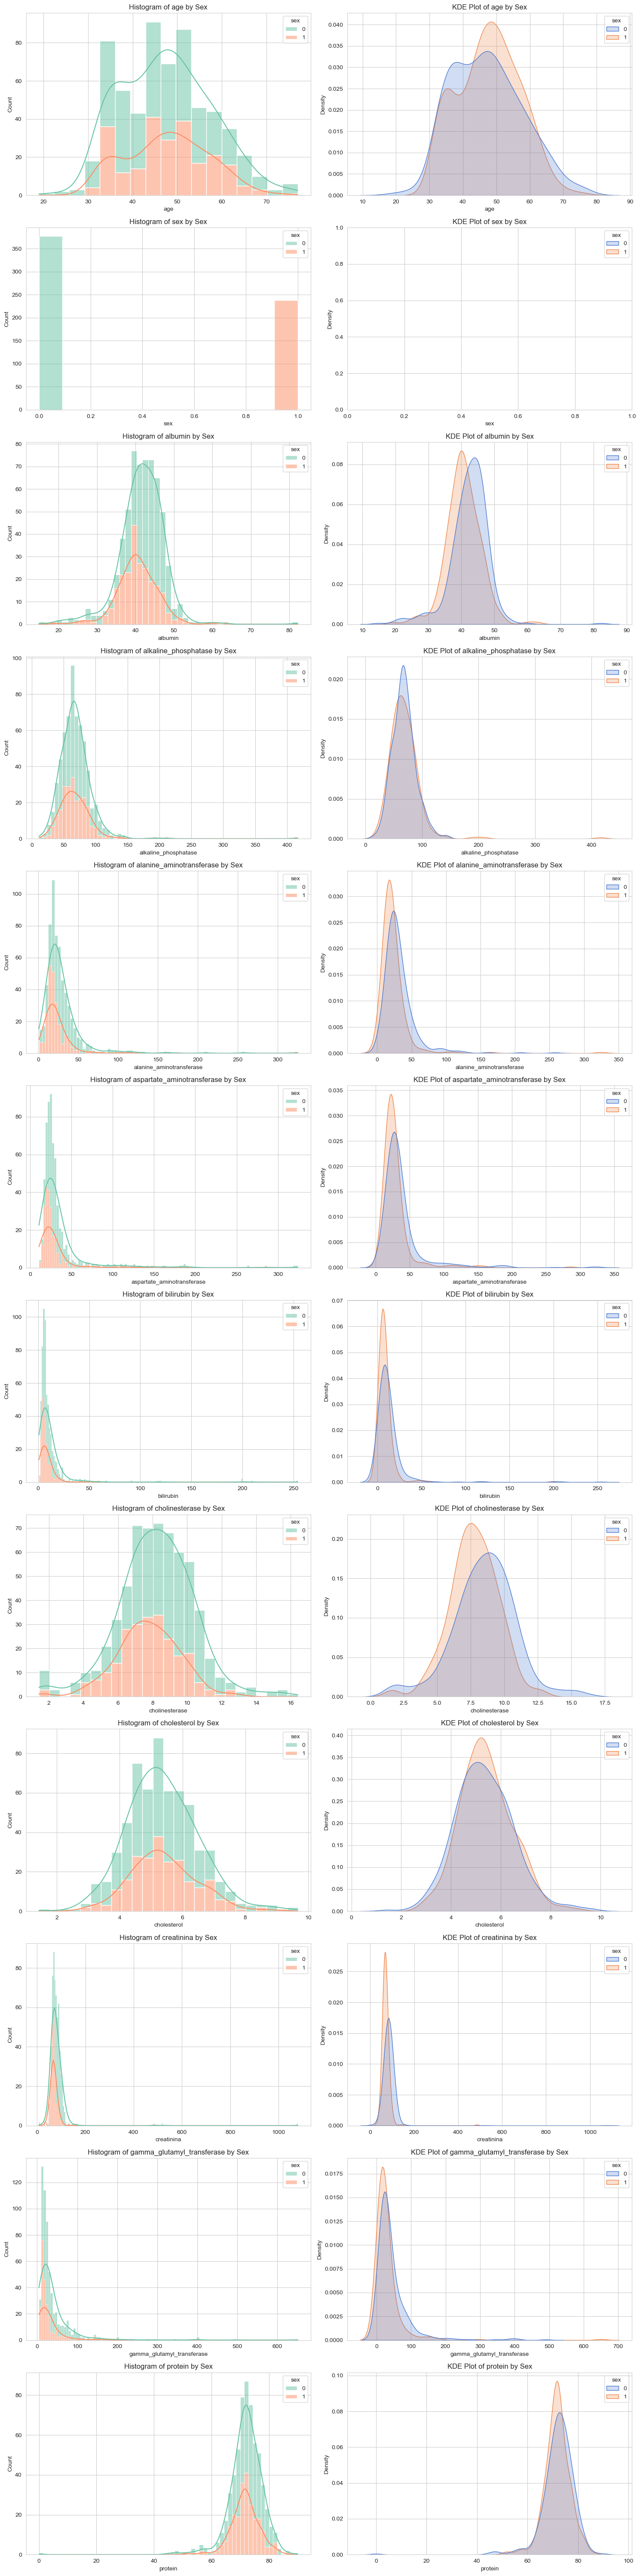

In [376]:
# Visualizing every column against sex and understanding their data distribution
# Set the size of the entire figure
plt.figure(figsize=(15, 5 * len(numeric_columns)))  # Adjust height based on the number of columns

# Loop through each numeric column and create histograms
for i, col in enumerate(numeric_columns):
    # Subplot for Histogram
    plt.subplot(len(numeric_columns), 2, 2 * i + 1)
    sns.histplot(data=df, x=col, hue='sex', multiple='stack', kde=True, palette="Set2")  # Stack histograms by 'sex'
    plt.title(f"Histogram of {col} by Sex")

    # Subplot for KDE Plot (optional for smoother density distribution)
    plt.subplot(len(numeric_columns), 2, 2 * i + 2)
    sns.kdeplot(data=df, x=col, hue='sex', fill=True, common_norm=False, palette="muted")  # KDE plot by 'sex'
    plt.title(f"KDE Plot of {col} by Sex")

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

<Axes: ylabel='albumin'>

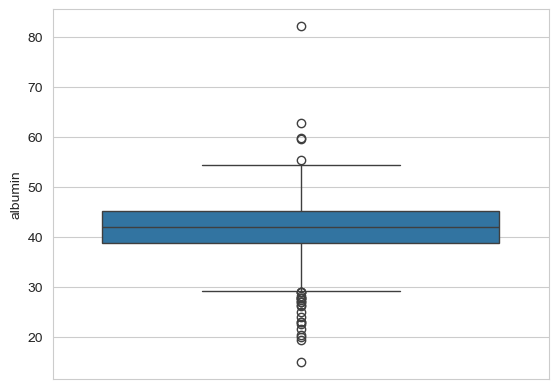

In [377]:
sns.boxplot(df.albumin)

In [378]:
df.albumin.sort_values(ascending=False).head()

216    82.2
346    62.9
405    59.8
259    59.7
173    55.4
Name: albumin, dtype: float64

<Axes: xlabel='albumin', ylabel='Count'>

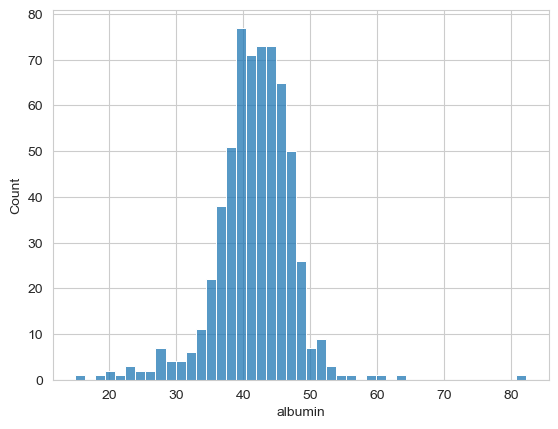

In [379]:
sns.histplot(df.albumin)

In [380]:
# We will use Percentile method for outlier treatment
upper_limit_albumin = df['albumin'].quantile(0.99)
lower_limit_albumin = df['albumin'].quantile(0.01)
print(upper_limit_albumin)
print(lower_limit_albumin)

53.258
23.0


In [381]:
# Capping with upper and lower limit
df['albumin'] = np.where(
    df['albumin']>=upper_limit_albumin,upper_limit_albumin,
                         np.where(
                             df['albumin']<=lower_limit_albumin,lower_limit_albumin,
                                  df['albumin']
                                  )
                         )

<Axes: ylabel='albumin'>

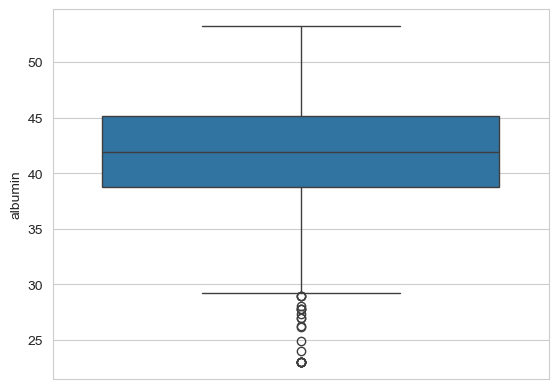

In [382]:
sns.boxplot(df.albumin)
# As lower and upper limit outliers has been removed.

<Axes: xlabel='albumin', ylabel='Count'>

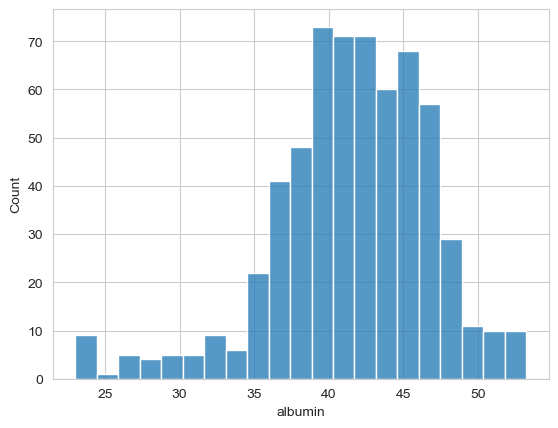

In [383]:
sns.histplot(df.albumin)

In [384]:
df.head(1)

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0


<Axes: ylabel='age'>

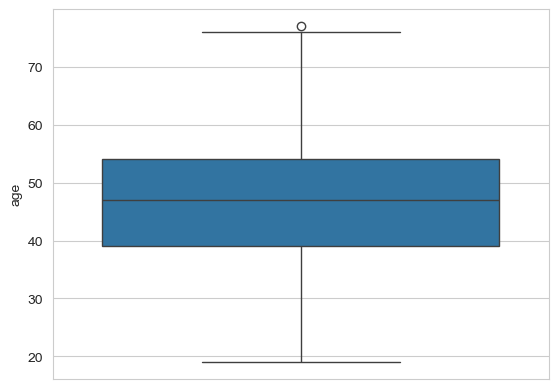

In [385]:
sns.boxplot(df.age)
# almost no outlier in the age column

<Axes: xlabel='age', ylabel='Count'>

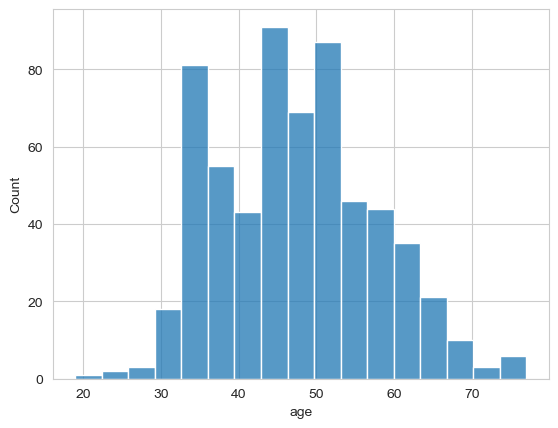

In [386]:
sns.histplot(df.age)

In [387]:
df.head(1)

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0


<Axes: ylabel='alkaline_phosphatase'>

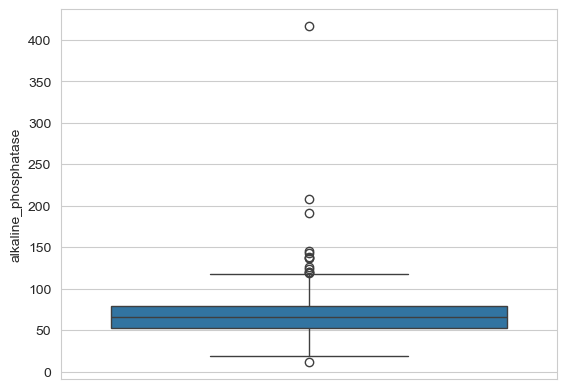

In [388]:
sns.boxplot(df.alkaline_phosphatase)

<Axes: xlabel='alkaline_phosphatase', ylabel='Count'>

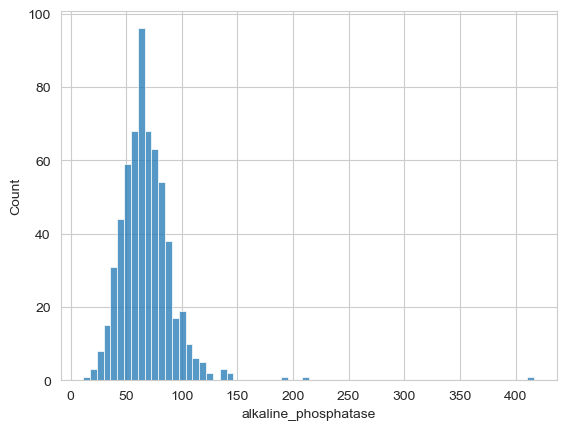

In [389]:
sns.histplot(df.alkaline_phosphatase)
#clearly outliers are present

In [390]:
#using percentile method for outlier treatment
upper_limit_alkaline_phosphatase = df['alkaline_phosphatase'].quantile(0.99)
lower_limit_alkaline_phosphatase = df['alkaline_phosphatase'].quantile(0.01)
print(upper_limit_alkaline_phosphatase)
print(lower_limit_alkaline_phosphatase)

137.158
27.328


In [391]:
# Capping with upper and lower limit
df['alkaline_phosphatase'] = np.where(
    df['alkaline_phosphatase']>=upper_limit_alkaline_phosphatase,upper_limit_alkaline_phosphatase,
                         np.where(
                             df['alkaline_phosphatase']<=lower_limit_alkaline_phosphatase,lower_limit_alkaline_phosphatase,
                                  df['alkaline_phosphatase']
                                  )
                         )

<Axes: ylabel='alkaline_phosphatase'>

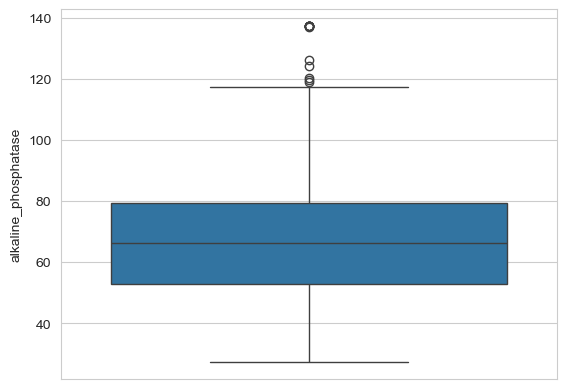

In [392]:
sns.boxplot(df.alkaline_phosphatase)
#Major outliers has been capped using percentile method

In [393]:
df.head(2)

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,no_disease,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5


<Axes: ylabel='alanine_aminotransferase'>

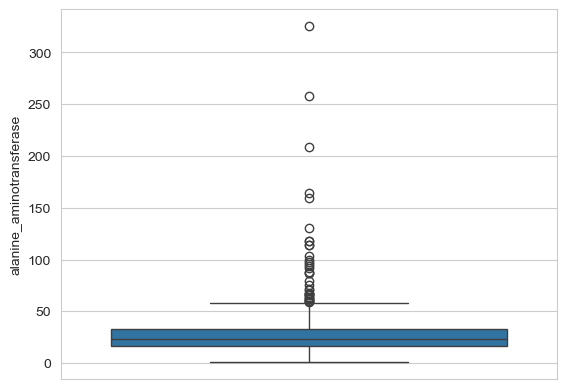

In [394]:
sns.boxplot(df.alanine_aminotransferase)

<Axes: xlabel='alanine_aminotransferase', ylabel='Count'>

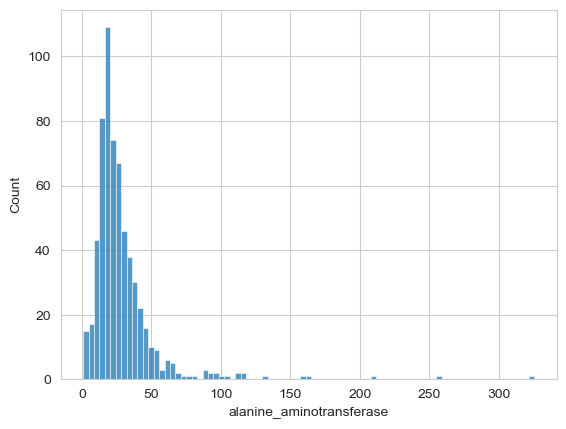

In [395]:
sns.histplot(df.alanine_aminotransferase)

In [396]:
#Treating outliers using percentile method
upper_limit_alanine_aminotransferase = df['alanine_aminotransferase'].quantile(0.99)
lower_limit_alanine_aminotransferase = df['alanine_aminotransferase'].quantile(0.01)
print(upper_limit_alanine_aminotransferase)
print(lower_limit_alanine_aminotransferase)

118.086
2.556


In [397]:
# Capping with upper and lower limit
df['alanine_aminotransferase'] = np.where(
    df['alanine_aminotransferase']>=upper_limit_alanine_aminotransferase,upper_limit_alanine_aminotransferase,
                         np.where(
                             df['alanine_aminotransferase']<=lower_limit_alanine_aminotransferase,lower_limit_alanine_aminotransferase,
                                  df['alanine_aminotransferase']
                                  )
                         )

<Axes: ylabel='alanine_aminotransferase'>

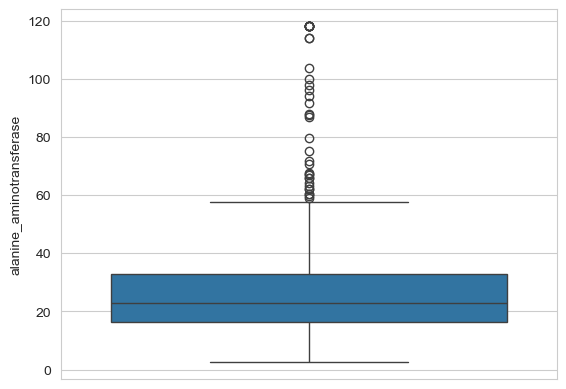

In [398]:
sns.boxplot(df.alanine_aminotransferase)
#Datapoints has been capped successfully as per upper and lower limit.

In [399]:
df.head(2)

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,no_disease,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5


<Axes: ylabel='aspartate_aminotransferase'>

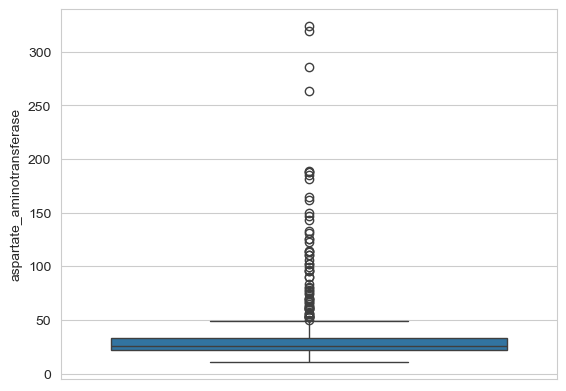

In [400]:
sns.boxplot(df.aspartate_aminotransferase)

<Axes: xlabel='aspartate_aminotransferase', ylabel='Count'>

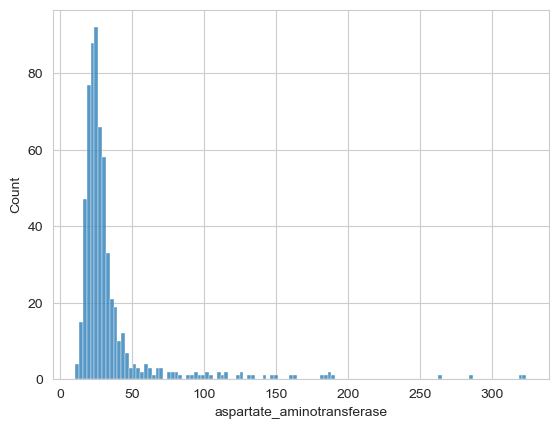

In [401]:
sns.histplot(df.aspartate_aminotransferase)

In [402]:
#Treating the outliers using percentile method
upper_limit_aspartate_aminotransferase = df['aspartate_aminotransferase'].quantile(0.99)
lower_limit_aspartate_aminotransferase = df['aspartate_aminotransferase'].quantile(0.01)
print(upper_limit_aspartate_aminotransferase)
print(lower_limit_aspartate_aminotransferase)

187.32200000000003
14.184


In [403]:
# Capping with upper and lower limit
df['aspartate_aminotransferase'] = np.where(
    df['aspartate_aminotransferase']>=upper_limit_aspartate_aminotransferase,upper_limit_aspartate_aminotransferase,
                         np.where(
                             df['aspartate_aminotransferase']<=lower_limit_aspartate_aminotransferase,lower_limit_aspartate_aminotransferase,
                                  df['aspartate_aminotransferase']
                                  )
                         )

<Axes: ylabel='aspartate_aminotransferase'>

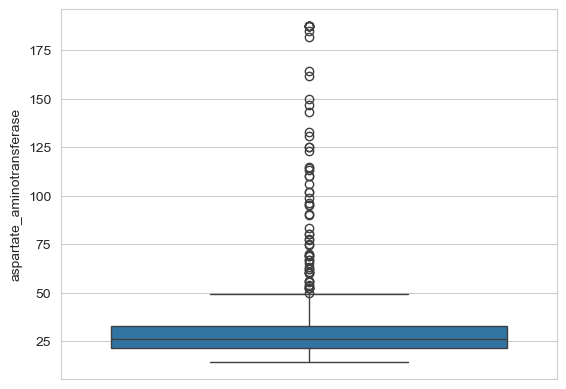

In [404]:
sns.boxplot(df.aspartate_aminotransferase)
#Outlier has been capped as per upper and lower limit

In [405]:
df.head(2)

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,no_disease,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5


<Axes: ylabel='bilirubin'>

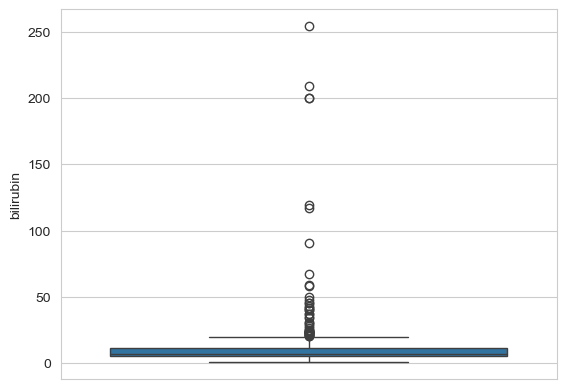

In [406]:
sns.boxplot(df.bilirubin)

<Axes: xlabel='bilirubin', ylabel='Count'>

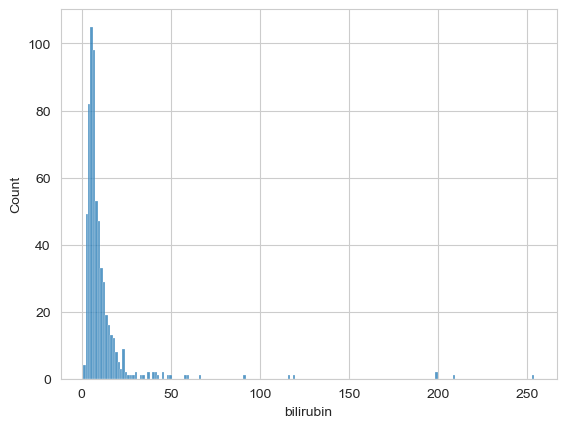

In [407]:
sns.histplot(df.bilirubin)

In [408]:
#Treating the outliers using percentile method
upper_limit_bilirubin = df['bilirubin'].quantile(0.99)
lower_limit_bilirubin = df['bilirubin'].quantile(0.01)
print(upper_limit_bilirubin)
print(lower_limit_bilirubin)

87.64000000000033
2.3


In [409]:
# Capping with upper and lower limit
df['bilirubin'] = np.where(
    df['bilirubin']>=upper_limit_bilirubin,upper_limit_bilirubin,
                         np.where(
                             df['bilirubin']<=lower_limit_bilirubin,lower_limit_bilirubin,
                                  df['bilirubin']
                                  )
                         )

<Axes: ylabel='bilirubin'>

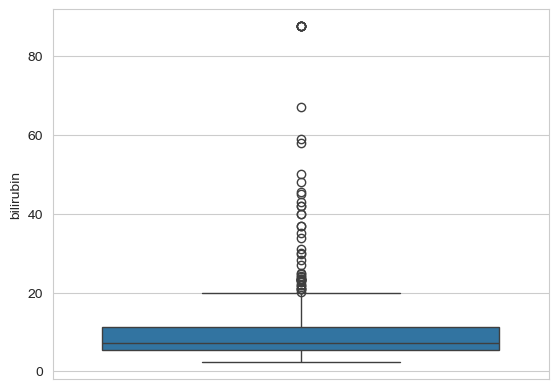

In [410]:
sns.boxplot(df.bilirubin)


<Axes: xlabel='bilirubin', ylabel='Count'>

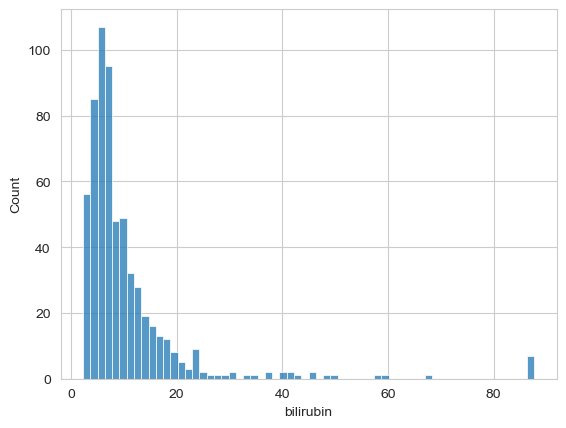

In [411]:
sns.histplot(df.bilirubin)
# Outliers has been capped successfully as per upper and lower limit

In [412]:
df.head(2)

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,no_disease,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5


<Axes: ylabel='cholinesterase'>

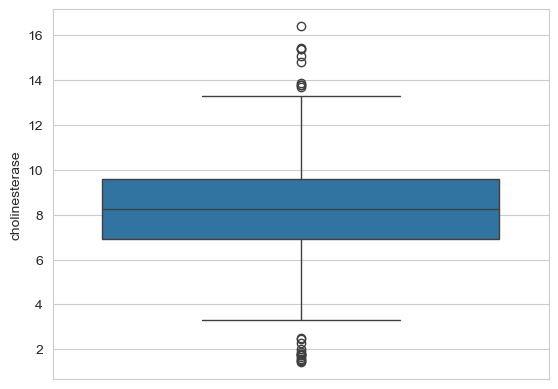

In [413]:
sns.boxplot(df.cholinesterase)

<Axes: xlabel='cholinesterase', ylabel='Count'>

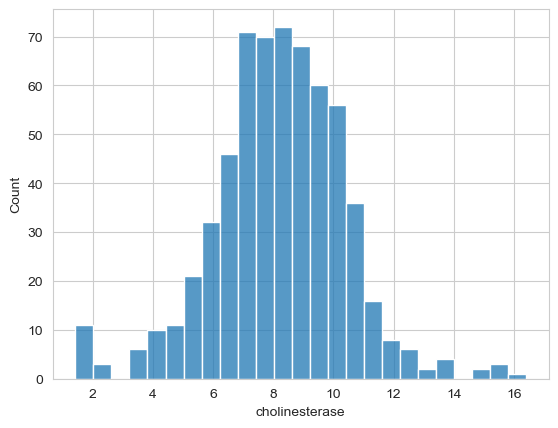

In [414]:
sns.histplot(df.cholinesterase)

In [415]:
#Treating the outliers using percentile method
upper_limit_cholinesterase = df['cholinesterase'].quantile(0.99)
lower_limit_cholinesterase = df['cholinesterase'].quantile(0.01)
print(upper_limit_cholinesterase)
print(lower_limit_cholinesterase)

13.851600000000001
1.7398


In [416]:
# Capping with upper and lower limit
df['cholinesterase'] = np.where(
    df['cholinesterase']>=upper_limit_cholinesterase,upper_limit_cholinesterase,
                         np.where(
                             df['cholinesterase']<=lower_limit_cholinesterase,lower_limit_cholinesterase,
                                  df['cholinesterase']
                                  )
                         )

<Axes: ylabel='cholinesterase'>

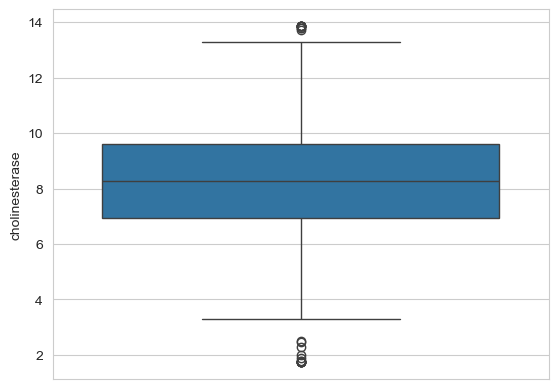

In [417]:
sns.boxplot(df.cholinesterase)
# Outliers has been successfully capped as per the upper and lower limit

In [418]:
df.head()

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,no_disease,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


<Axes: ylabel='cholesterol'>

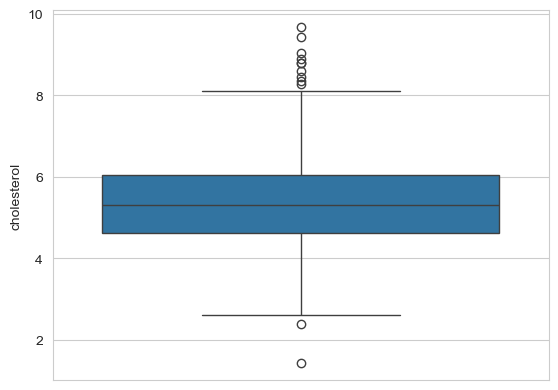

In [419]:
sns.boxplot(df.cholesterol)

<Axes: xlabel='cholesterol', ylabel='Count'>

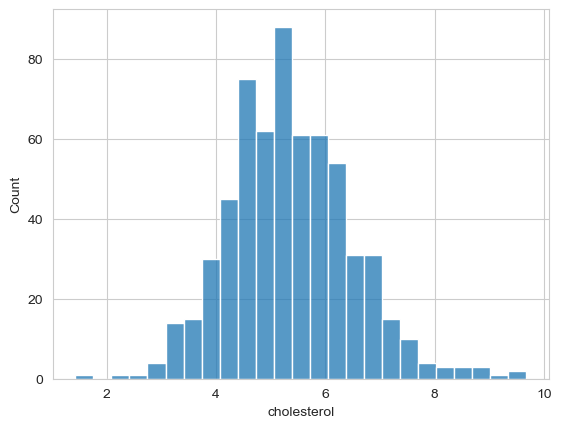

In [420]:
sns.histplot(df.cholesterol)

In [421]:
#Treating the outliers using percentile method
upper_limit_cholesterol = df['cholesterol'].quantile(0.99)
lower_limit_cholesterol = df['cholesterol'].quantile(0.01)
print(upper_limit_cholesterol)
print(lower_limit_cholesterol)

8.580400000000001
3.0298


In [422]:
# Capping with upper and lower limit
df['cholesterol'] = np.where(
    df['cholesterol']>=upper_limit_cholesterol,upper_limit_cholesterol,
                         np.where(
                             df['cholesterol']<=lower_limit_cholesterol,lower_limit_cholesterol,
                                  df['cholesterol']
                                  )
                         )

<Axes: ylabel='cholesterol'>

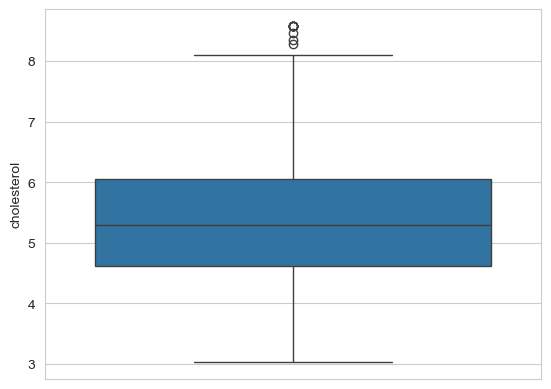

In [423]:
sns.boxplot(df.cholesterol)
#outliers has been successfully capped as per upper and lower limit

In [424]:
df.head(2)

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,no_disease,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5


<Axes: ylabel='creatinina'>

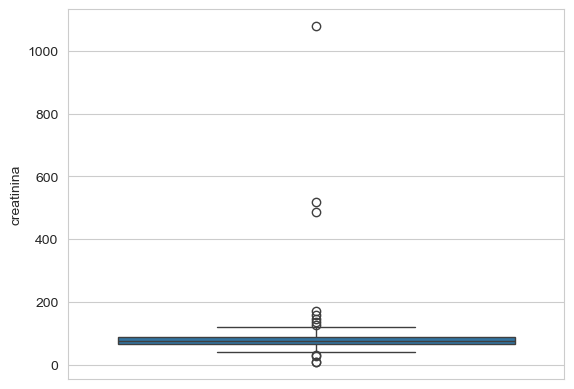

In [425]:
sns.boxplot(df.creatinina)

<Axes: xlabel='creatinina', ylabel='Count'>

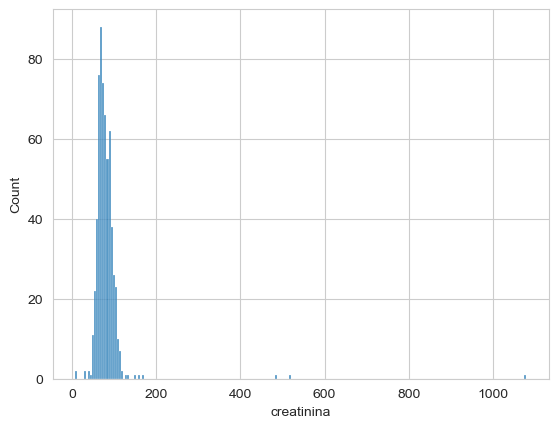

In [426]:
sns.histplot(df.creatinina)

In [427]:
#Treating the outliers using percentile method
upper_limit_creatinina = df['creatinina'].quantile(0.99)
lower_limit_creatinina = df['creatinina'].quantile(0.01)
print(upper_limit_creatinina)
print(lower_limit_creatinina)

134.8260000000001
45.764


In [428]:
# Capping with upper and lower limit
df['creatinina'] = np.where(
    df['creatinina']>=upper_limit_creatinina,upper_limit_creatinina,
                         np.where(
                             df['creatinina']<=lower_limit_creatinina,lower_limit_creatinina,
                                  df['creatinina']
                                  )
                         )

<Axes: ylabel='creatinina'>

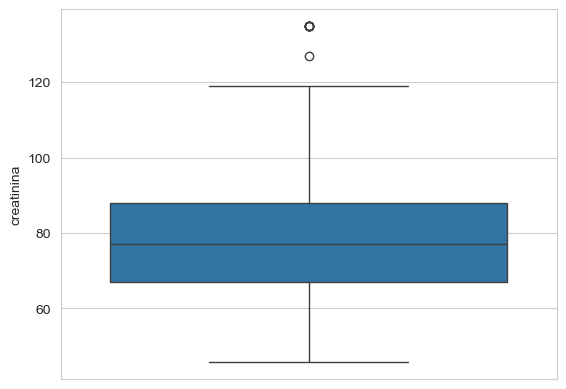

In [429]:
sns.boxplot(df.creatinina)
# Outliers has been capped successfully as per the upper and lower limit.

In [430]:
df.head(2)

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,no_disease,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5


<Axes: ylabel='gamma_glutamyl_transferase'>

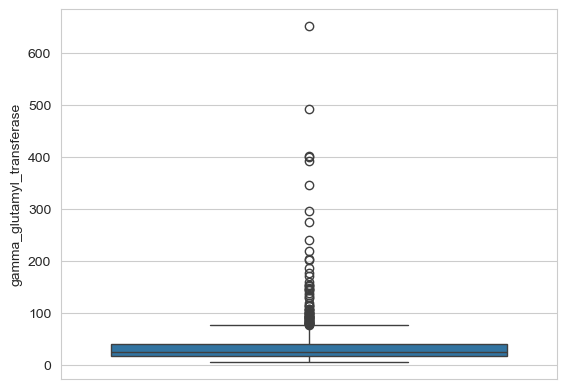

In [431]:
sns.boxplot(df.gamma_glutamyl_transferase)

<Axes: xlabel='gamma_glutamyl_transferase', ylabel='Count'>

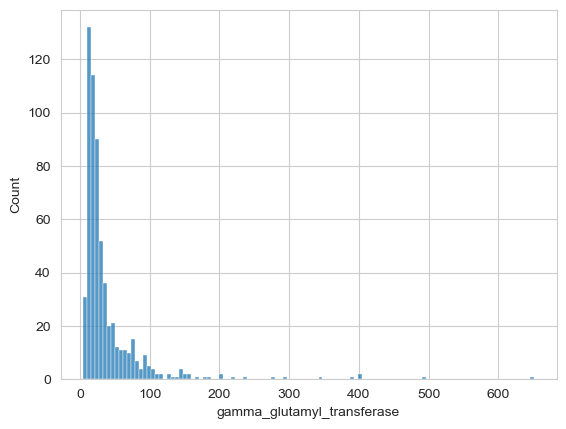

In [432]:
sns.histplot(df.gamma_glutamyl_transferase)

In [433]:
#Treating the outliers using percentile method
upper_limit_gamma_glutamyl_transferase = df['gamma_glutamyl_transferase'].quantile(0.99)
lower_limit_gamma_glutamyl_transferase = df['gamma_glutamyl_transferase'].quantile(0.01)
print(upper_limit_gamma_glutamyl_transferase)
print(lower_limit_gamma_glutamyl_transferase)

292.53400000000033
7.228000000000001


In [434]:
# Capping with upper and lower limit
df['gamma_glutamyl_transferase'] = np.where(
    df['gamma_glutamyl_transferase']>=upper_limit_gamma_glutamyl_transferase,upper_limit_gamma_glutamyl_transferase,
                         np.where(
                             df['gamma_glutamyl_transferase']<=lower_limit_gamma_glutamyl_transferase,lower_limit_gamma_glutamyl_transferase,
                                  df['gamma_glutamyl_transferase']
                                  )
                         )

<Axes: xlabel='gamma_glutamyl_transferase', ylabel='Count'>

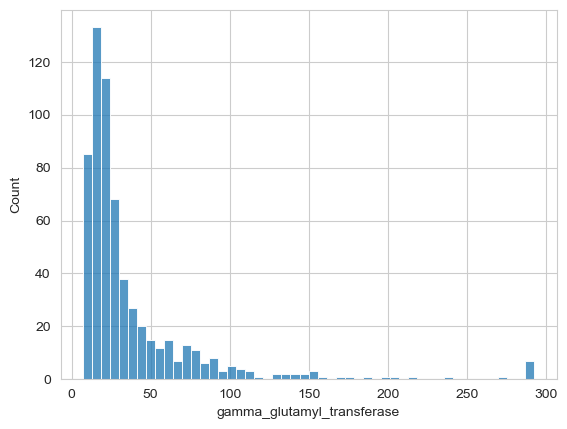

In [435]:
sns.histplot(df.gamma_glutamyl_transferase)
# As per upper and lower limit data points has been capped.

In [436]:
df.head(2)

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,no_disease,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5


<Axes: ylabel='protein'>

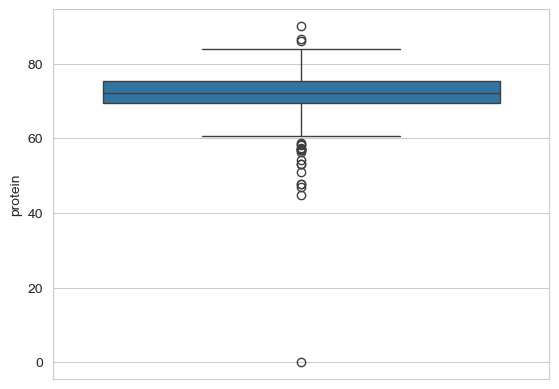

In [437]:
sns.boxplot(df.protein)

<Axes: xlabel='protein', ylabel='Count'>

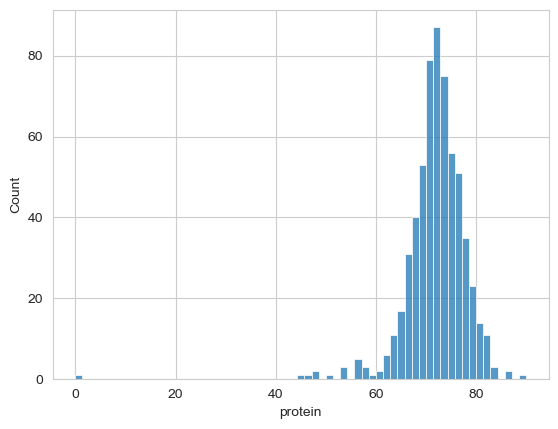

In [438]:
sns.histplot(df.protein)

In [439]:
#Treating the outliers using percentile method
upper_limit_protein = df['protein'].quantile(0.99)
lower_limit_protein = df['protein'].quantile(0.01)
print(upper_limit_protein)
print(lower_limit_protein)

82.686
53.114000000000004


In [440]:
# Capping with upper and lower limit
df['protein'] = np.where(
    df['protein']>=upper_limit_protein,upper_limit_protein,
                         np.where(
                             df['protein']<=lower_limit_protein,lower_limit_protein,
                                  df['protein']
                                  )
                         )

<Axes: xlabel='protein', ylabel='Count'>

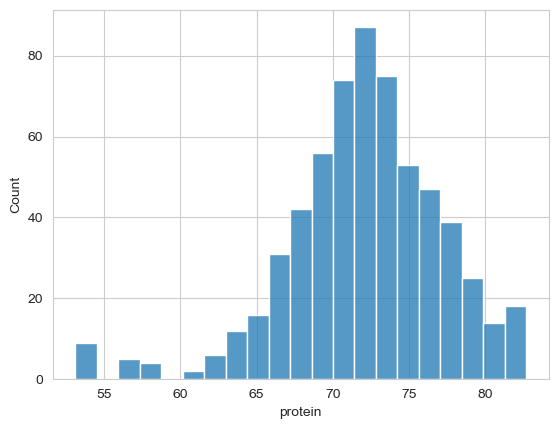

In [441]:
sns.histplot(df.protein)
# As per upper and lower limit , the outliers has been capped.

In [442]:
# Making copy of dataset df
df1 = df.copy()


In [443]:
# Creating bins for age column in dataframe df1
# Define age bins and labels
bins = [0, 13, 20, 40, 60, 90]  # Define your age bins
labels = ['0-12 (children)', '13-19 (teens)', '20-39 (adults)', '40-59 (middle aged)', '>60 (senior citizens)']  # Labels for the bins
# 0-12 children, 13-19 teenage, 20-39 adults, 40 - 59 middle aged, >60 senior citizen - to be followed
# Create a new column for binned ages
df1['age_bin'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Display the updated DataFrame
df1[['age', 'age_bin']].head()

,age,age_bin
0,32,20-39 (adults)
1,32,20-39 (adults)
2,32,20-39 (adults)
3,32,20-39 (adults)
4,32,20-39 (adults)


In [444]:
# Identifying unique values and their counts in age_bin column
df1['age_bin'].value_counts().sort_index()

age_bin
0-12 (children)            0
13-19 (teens)              1
20-39 (adults)           159
40-59 (middle aged)      380
>60 (senior citizens)     75
Name: count, dtype: int64

Text(0.5, 0, 'Age Bin')

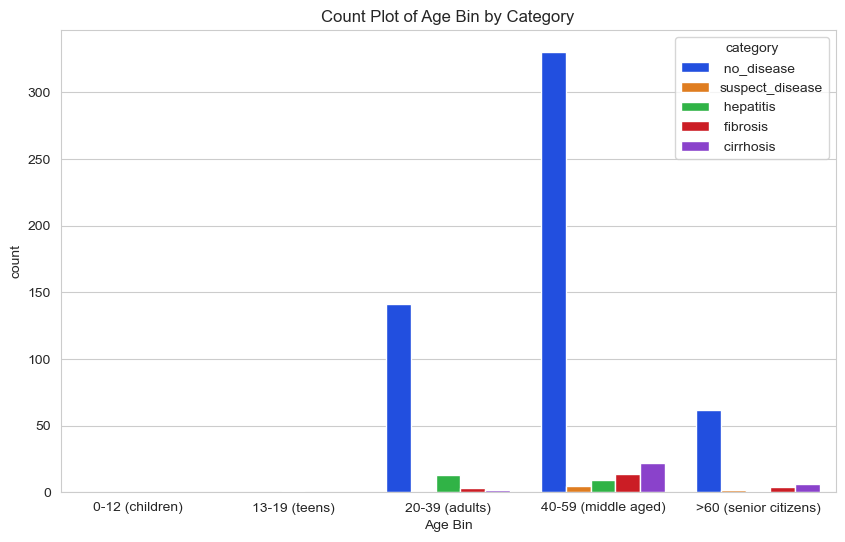

In [445]:
# Visualize the age_bin grouping by category
plt.figure(figsize=(10, 6))
sns.countplot(x='age_bin', hue='category', data=df1, palette = 'bright')
plt.title('Count Plot of Age Bin by Category')
plt.xlabel('Age Bin')

In [446]:
# Check if the 'category' column represents disease categories correctly
# Assuming 'category' contains liver disease categories (e.g., 'No Disease', 'Hepatitis', etc.)
age_bin_disease_counts = df1.groupby(['age_bin', 'category']).size().unstack(fill_value=0)

# Display the age bin distribution by disease category
age_bin_disease_counts

category,cirrhosis,fibrosis,hepatitis,no_disease,suspect_disease
age_bin,,,,,
0-12 (children),0,0,0,0,0
13-19 (teens),0,0,1,0,0
20-39 (adults),2,3,13,141,0
40-59 (middle aged),22,14,9,330,5
>60 (senior citizens),6,4,1,62,2


In [447]:
# finding the percentage of the categories of disease by age_bin
# Step 1: Group by 'age_bin' and 'category' (disease type) and count occurrences
grouped_data = df1.groupby(['age_bin', 'category']).size().reset_index(name='count')

# Step 2: Calculate the total number of occurrences for each age group
total_per_age_group = df1.groupby('age_bin').size().reset_index(name='total')

# Step 3: Merge the counts with the total for each age group
merged_data = pd.merge(grouped_data, total_per_age_group, on='age_bin')

# Step 4: Calculate the percentage of each disease type within the age group
merged_data['percent'] = (merged_data['count'] / merged_data['total']) * 100

# Step 5: Pivot the data to have age_bin as rows and category as columns with percent as values
pivot_table = merged_data.pivot_table(index='age_bin', columns='category', values='percent', fill_value=0)

# Step 6: Display the result
pivot_table

category,cirrhosis,fibrosis,hepatitis,no_disease,suspect_disease
age_bin,,,,,
13-19 (teens),0.000000,0.000000,100.000000,0.000000,0.000000
20-39 (adults),1.257862,1.886792,8.176101,88.679245,0.000000
40-59 (middle aged),5.789474,3.684211,2.368421,86.842105,1.315789
>60 (senior citizens),8.000000,5.333333,1.333333,82.666667,2.666667


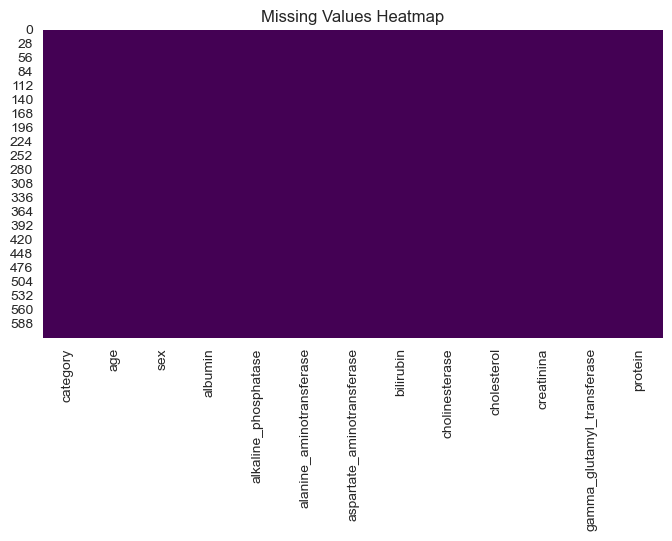

In [448]:
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")  # Heatmap provides a visual of where missing values are located in the dataset
plt.title('Missing Values Heatmap')
plt.show()

<Axes: >

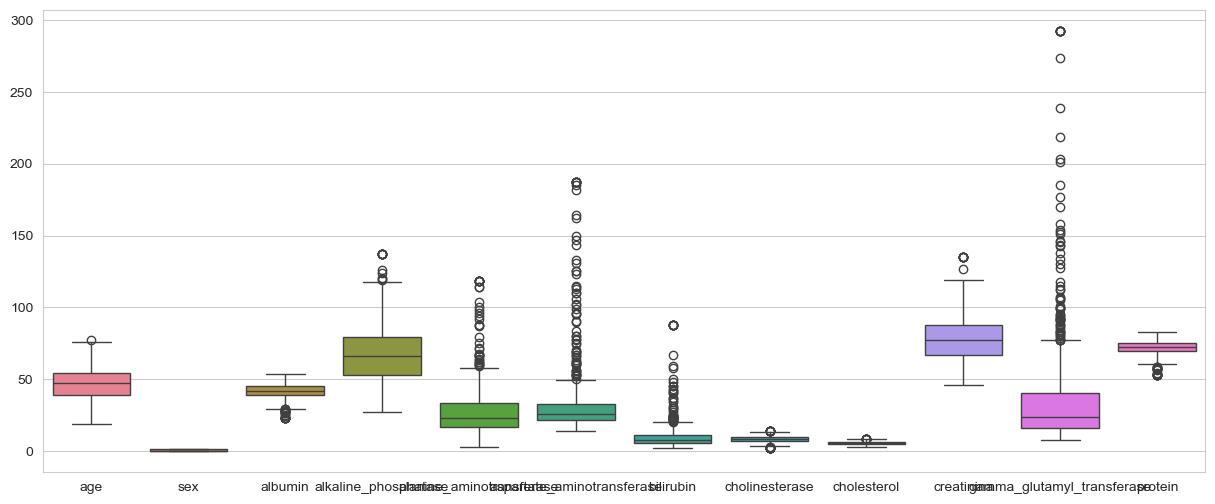

In [449]:
plt.figure(figsize=(15, 6))
sns.boxplot(df)

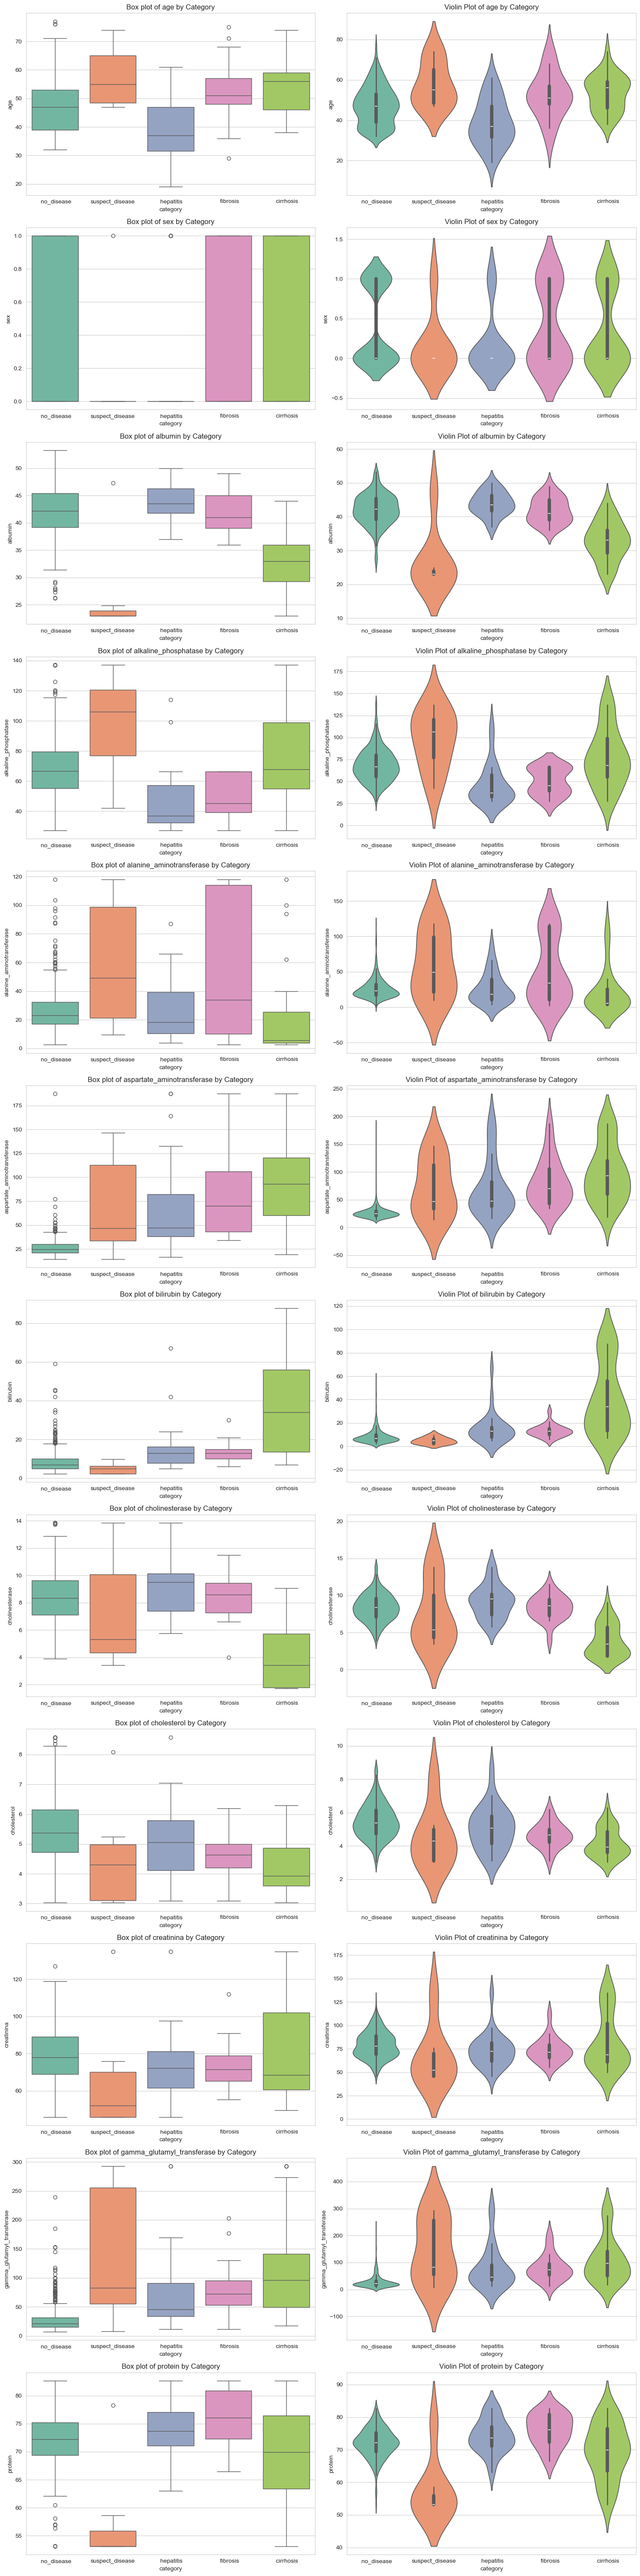

In [450]:
# Visualizing every column against category and understanding their data distribution
# Set the size of the entire figure
plt.figure(figsize=(15, 5 * len(numeric_columns)))  # Adjust height based on the number of columns

# Loop through each numeric column and create a boxplot and violin plot
for i, col in enumerate(numeric_columns):  # enumerate - provides both the index (i) and the column name (col) for each numeric column
    # Subplot for Boxplot
    # Shows the distribution (median, quartiles, and outliers) of each numeric column split by the category.
    plt.subplot(len(numeric_columns), 2, 2 * i + 1) # no. of rows, no. of columns, position of sub plots. 2*i+1 ensures its always an odd number position
    #sns.histplot(data=df, x=col, hue='category', multiple='stack', kde=True, palette="bright")  # Stack histograms by 'sex'
    sns.boxplot(x='category', y=col, data=df, palette="Set2")  # Boxplot to visualize the distribution per category
    plt.title(f"Box plot of {col} by Category")

    # Subplot for Violin Plot
    # Shows the distribution and probability density of each numeric column against the category.
    # The KDE curve within the plot helps understand the density of data at different values.
    plt.subplot(len(numeric_columns), 2, 2 * i + 2) # no. of rows, no. of columns, position of sub plots. 2*i+2 ensures its always an even numbered position
    sns.violinplot(x='category', y=col, data=df, palette="Set2")  # Violin plot for smooth density estimation
    plt.title(f"Violin Plot of {col} by Category")

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()  # Display the plots

# **Machine Learning Models**

## **Data Preparation**

In [451]:
df['category'].unique()

array([' no_disease', 'suspect_disease', ' hepatitis', ' fibrosis',
       ' cirrhosis'], dtype=object)

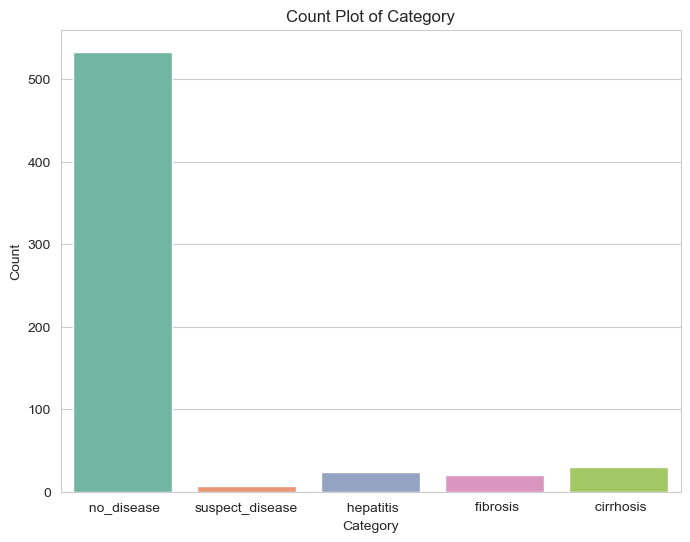

In [452]:
# Visualizing the category column using the bar graph before encoding
plt.figure(figsize=(8, 6))
sns.countplot(x='category', data=df, palette="Set2")
plt.title('Count Plot of Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [453]:
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is named 'df' and the column you want to encode is 'column_name'
column_to_encode = 'category'

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to the column data
le.fit(df['category'])

# Transform the column data using the fitted encoder
df['category'] = le.transform(df['category'])

In [454]:
df['category'].unique()

array([3, 4, 2, 1, 0])

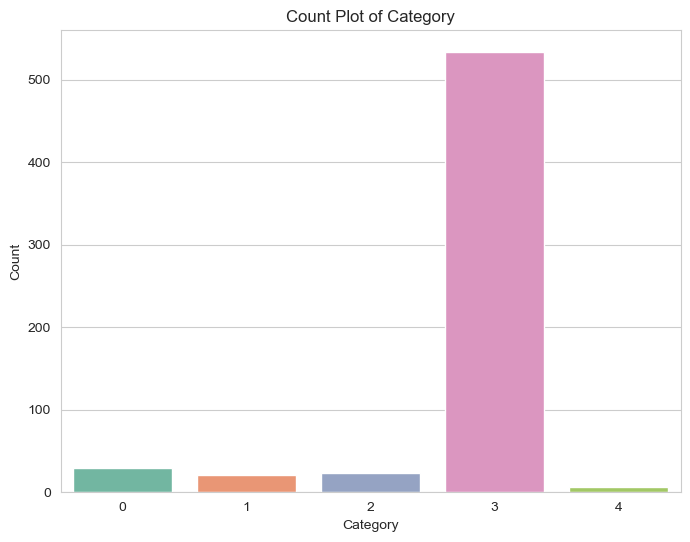

In [455]:
# Visualizing the category column using the bar graph after encoding
plt.figure(figsize=(8, 6))
sns.countplot(x='category', data=df, palette="Set2")
plt.title('Count Plot of Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [456]:
# Creating a copy of the dataset so as to not lose the original multiclasses before converting category into a binary class variable
df_copy = df.copy()

In [457]:
# Converting all the different diseases as 1 and no_disease as 0
## if score==negative, mark 0 ;else 1
def partition(x):
    if x == 3 :
        return 0
    return 1

df['category'] = df['category'].map(partition)

In [458]:
df.head(4)

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7


In [459]:
df['category'].unique()

array([0, 1], dtype=int64)

In [460]:
df['sex'].unique()

array([0, 1], dtype=int64)

In [461]:
# Create separate object for target variable
y = df.category

# Create separate object for input features
X = df.drop('category', axis=1)

# Standardizing the X variables
S_scaler = StandardScaler()
X = S_scaler.fit_transform(X)

In [462]:
# Create separate object for target variable with the multiclass from the copied dataset
Y_mc = df_copy.category

In [463]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1234,
                                                    stratify=df.category)

In [464]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(492, 12) (123, 12) (492,) (123,)


**Data standardization**


*   In Data Standardization we perform zero mean centring and unit scaling; i.e. we make the mean of all the features as zero and the standard deviation as 1.
*   Thus we use mean and standard deviation of each feature.
*   It is very important to save the mean and standard deviation for each of the feature from the training set, because we use the same mean and standard deviation in the test set.






## **Model Building - Siddha**

### **01. Random Forest**

In [465]:
# Define parameter grid
tuned_param_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [466]:
# Instantiate Random Forest
rf = RandomForestClassifier()

In [467]:
# Perform RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=tuned_param_rf, n_iter=10, cv=5, n_jobs=-1, random_state=42)
random_search_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500]},
                   random_state=42)

In [468]:
# Predict and evaluate
y_pred_rf = random_search_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, random_search_rf.predict_proba(X_test)[:, 1])

Confusion Matrix:
[[106   1]
 [  6  10]]


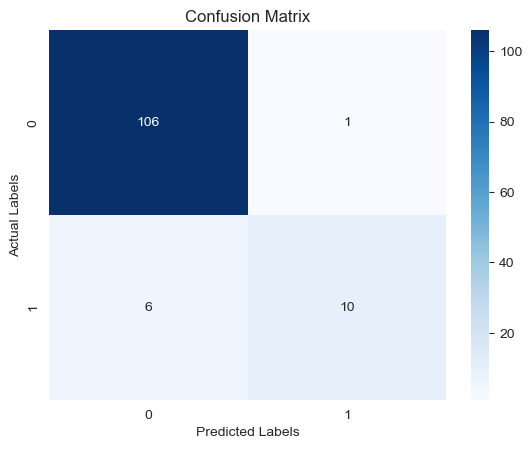

In [469]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(f'Confusion Matrix:\n{conf_matrix_rf}')

# Visualize Confusion Matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()


In [470]:
# Classification Report
from sklearn.metrics import classification_report # Import classification_report
class_report_rf = classification_report(y_test, y_pred_rf)
print(f'Classification Report:\n{class_report_rf}')


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       107
           1       0.91      0.62      0.74        16

    accuracy                           0.94       123
   macro avg       0.93      0.81      0.85       123
weighted avg       0.94      0.94      0.94       123



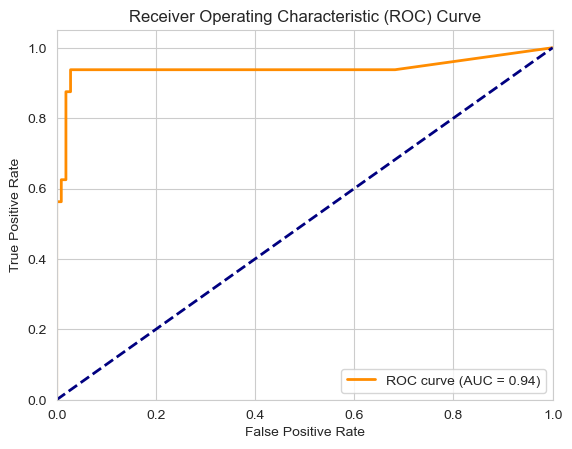

In [471]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob_rf = random_search_rf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)

# Calculate AUC using the auc function
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [472]:
print(f"Random Forest - Accuracy: {accuracy_rf:.4f}, ROC AUC: {roc_auc_rf:.4f}")

Random Forest - Accuracy: 0.9431, ROC AUC: 0.9404


### **02. KNN**

In [473]:
# Define parameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [474]:
# Instantiate KNN
knn = KNeighborsClassifier()

In [475]:
# Perform RandomizedSearchCV
random_search_knn = RandomizedSearchCV(estimator=knn, param_distributions=param_grid_knn, n_iter=10, cv=5, n_jobs=-1, random_state=42)
random_search_knn.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': [3, 5, 7],
                                        'weights': ['uniform', 'distance']},
                   random_state=42)

In [476]:
# Predict and evaluate
y_pred_knn = random_search_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, random_search_knn.predict_proba(X_test)[:, 1])

Confusion Matrix:
[[107   0]
 [  8   8]]


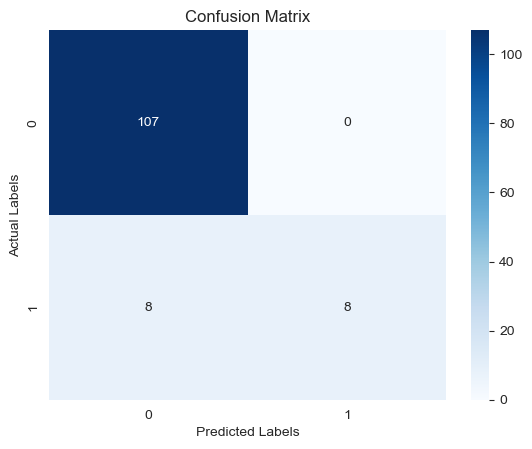

In [477]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print(f'Confusion Matrix:\n{conf_matrix_knn}')

# Visualize Confusion Matrix
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()


In [478]:
# Classification Report
class_report_knn = classification_report(y_test, y_pred_knn)
print(f'Classification Report:\n{class_report_knn}')


Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       107
           1       1.00      0.50      0.67        16

    accuracy                           0.93       123
   macro avg       0.97      0.75      0.82       123
weighted avg       0.94      0.93      0.93       123



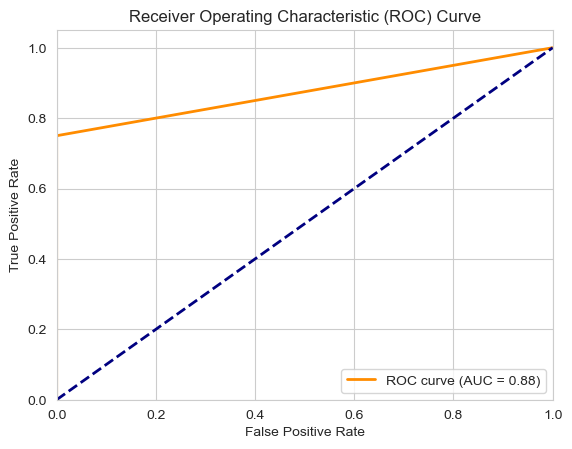

In [479]:

y_prob_knn = random_search_knn.predict_proba(X_test)[:, 1]
# Calculate ROC curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)

# Calculate AUC using the auc function
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



In [480]:
print(f"KNN - Accuracy: {accuracy_knn:.4f}, ROC AUC: {roc_auc_knn:.4f}")

KNN - Accuracy: 0.9350, ROC AUC: 0.8750


### **03. XGBoost**

In [481]:
# Define parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

In [482]:
# Instantiate XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [483]:
# Perform RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid_xgb, n_iter=10, cv=5, n_jobs=-1, random_state=42)
random_search_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learnin...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 500]},
                   random_state=42)

In [484]:
# Predict and evaluate
y_pred_xgb = random_search_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, random_search_xgb.predict_proba(X_test)[:, 1])

Confusion Matrix:
[[106   1]
 [  4  12]]


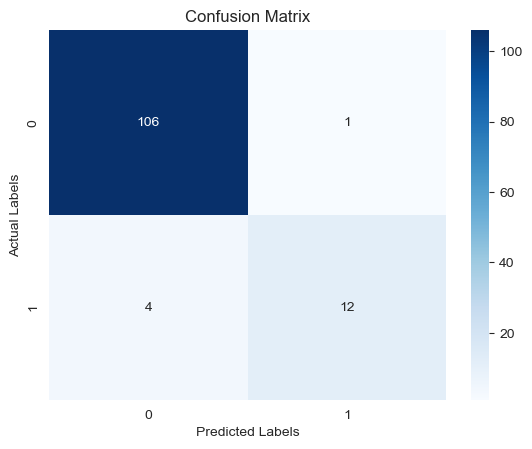

In [485]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print(f'Confusion Matrix:\n{conf_matrix_xgb}')

# Visualize Confusion Matrix
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()


In [486]:
# Required Imports
from sklearn.metrics import classification_report, confusion_matrix

# Classification Report
class_report_xgb = classification_report(y_test, y_pred_xgb)
print(f'Classification Report:\n{class_report_xgb}')


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       107
           1       0.92      0.75      0.83        16

    accuracy                           0.96       123
   macro avg       0.94      0.87      0.90       123
weighted avg       0.96      0.96      0.96       123



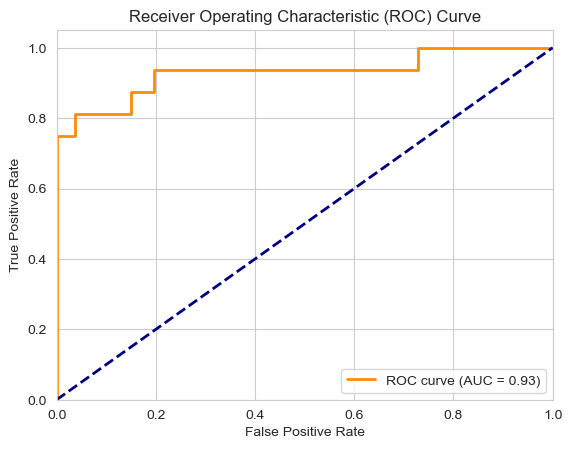

In [487]:
y_prob_xgb = random_search_xgb.predict_proba(X_test)[:, 1]
# Calculate ROC curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)

# Calculate AUC using the auc function
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curve
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



In [488]:
print(f"XGBoost - Accuracy: {accuracy_xgb:.4f}, ROC AUC: {roc_auc_xgb:.4f}")

XGBoost - Accuracy: 0.9593, ROC AUC: 0.9305


### **04. Neural Network**

In [489]:
# Define parameter grid
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive']
}

In [490]:
# Instantiate Neural Network
nn = MLPClassifier(max_iter=1000)

In [491]:
# Perform RandomizedSearchCV
random_search_nn = RandomizedSearchCV(estimator=nn, param_distributions=param_grid_nn, n_iter=10, cv=5, n_jobs=-1, random_state=42)
random_search_nn.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000), n_jobs=-1,
                   param_distributions={'activation': ['relu', 'tanh'],
                                        'hidden_layer_sizes': [(50,), (100,),
                                                               (100, 50)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['adam', 'sgd']},
                   random_state=42)

In [492]:
# Predict and evaluate
y_pred_nn = random_search_nn.predict(X_test)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
roc_auc_nn = roc_auc_score(y_test, random_search_nn.predict_proba(X_test)[:, 1])

Confusion Matrix:
[[107   0]
 [  4  12]]


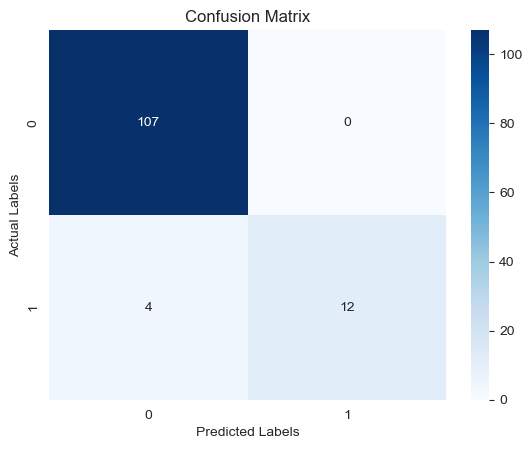

In [493]:
# Confusion Matrix
# Confusion matrix helps evaluate the performance by showing true positives, true negatives, false positives, and false negatives
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
print(f'Confusion Matrix:\n{conf_matrix_nn}')

# Visualizing the confusion matrix using a heatmap
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [494]:
# The classification report includes precision, recall, f1-score, and support for each class
class_report_nn = classification_report(y_test, y_pred_nn)
print(f'Classification Report:\n{class_report_nn}')

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.75      0.86        16

    accuracy                           0.97       123
   macro avg       0.98      0.88      0.92       123
weighted avg       0.97      0.97      0.97       123



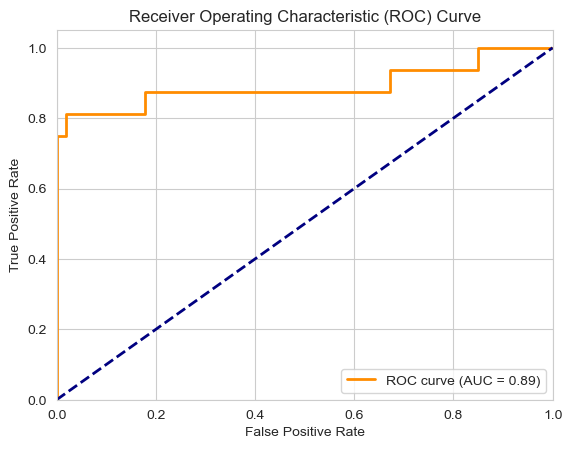

In [495]:
# ROC curve helps to visualize the performance of the classifier over different threshold values
y_prob_nn = random_search_nn.predict_proba(X_test)[:, 1]
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_prob_nn)  # Calculating false positive rate and true positive rate
roc_auc_nn = auc(fpr_nn, tpr_nn)  # Calculating the area under the curve (AUC)

# Plot ROC curve
plt.figure()
plt.plot(fpr_nn, tpr_nn, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_nn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [496]:
print(f"Neural Network - Accuracy: {accuracy_nn:.4f}, ROC AUC: {roc_auc_nn:.4f}")

Neural Network - Accuracy: 0.9675, ROC AUC: 0.8925


### **05. Gradient Boosting**

In [497]:
# Define parameter grid
param_grid_gbm = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

In [498]:
# Instantiate Gradient Boosting
gbm = GradientBoostingClassifier()

In [499]:
# Perform RandomizedSearchCV
random_search_gbm = RandomizedSearchCV(estimator=gbm, param_distributions=param_grid_gbm, n_iter=10, cv=5, n_jobs=-1, random_state=42)
random_search_gbm.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 500]},
                   random_state=42)

In [500]:
# Predict and evaluate
y_pred_gbm = random_search_gbm.predict(X_test)
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
roc_auc_gbm = roc_auc_score(y_test, random_search_gbm.predict_proba(X_test)[:, 1])

Confusion Matrix:
[[105   2]
 [  5  11]]


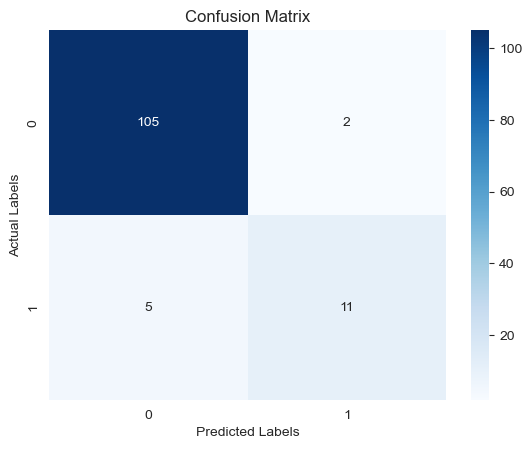

In [501]:
# Confusion Matrix
# Confusion matrix helps evaluate the performance by showing true positives, true negatives, false positives, and false negatives
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
print(f'Confusion Matrix:\n{conf_matrix_gbm}')

# Visualizing the confusion matrix using a heatmap
sns.heatmap(conf_matrix_gbm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [502]:
# The classification report includes precision, recall, f1-score, and support for each class
class_report_gbm = classification_report(y_test, y_pred_gbm)
print(f'Classification Report:\n{class_report_gbm}')

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       107
           1       0.85      0.69      0.76        16

    accuracy                           0.94       123
   macro avg       0.90      0.83      0.86       123
weighted avg       0.94      0.94      0.94       123



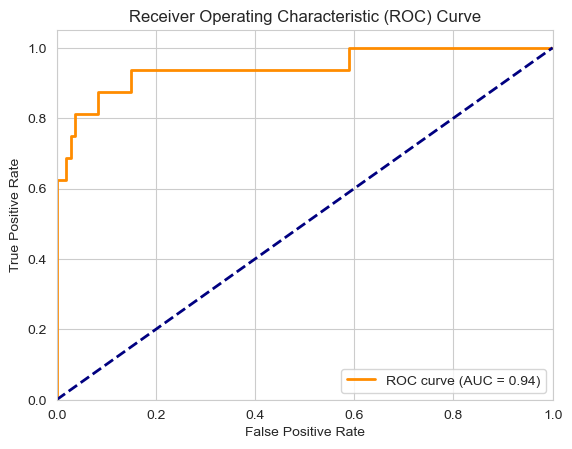

In [503]:
y_prob_gbm = random_search_gbm.predict_proba(X_test)[:, 1]
# ROC curve helps to visualize the performance of the classifier over different threshold values
fpr_gbm, tpr_gbm, thresholds_gbm = roc_curve(y_test, y_prob_gbm)  # Calculating false positive rate and true positive rate
roc_auc_gbm = auc(fpr_gbm, tpr_gbm)  # Calculating the area under the curve (AUC)

# Plot ROC curve
plt.figure()
plt.plot(fpr_gbm, tpr_gbm, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_gbm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [504]:
print(f"Gradient Boosting - Accuracy: {accuracy_gbm:.4f}, ROC AUC: {roc_auc_gbm:.4f}")

Gradient Boosting - Accuracy: 0.9431, ROC AUC: 0.9433


### **06. Support Vector Classifier (SVC)**

In [505]:
# Define parameter grid
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [506]:
# Instantiate SVC
svc = SVC(probability=True)

In [507]:
# Perform RandomizedSearchCV
random_search_svc = RandomizedSearchCV(estimator=svc, param_distributions=param_grid_svc, n_iter=10, cv=5, n_jobs=-1, random_state=42)
random_search_svc.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf']},
                   random_state=42)

In [508]:
# Predict and evaluate
y_pred_svc = random_search_svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
roc_auc_svc = roc_auc_score(y_test, random_search_svc.predict_proba(X_test)[:, 1])

Confusion Matrix:
[[106   1]
 [  6  10]]


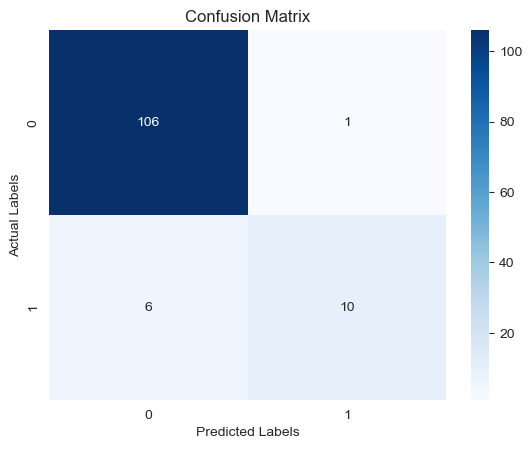

In [509]:
# Confusion matrix helps evaluate the performance by showing true positives, true negatives, false positives, and false negatives
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print(f'Confusion Matrix:\n{conf_matrix_svc}')

# Visualizing the confusion matrix using a heatmap
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [510]:
# The classification report includes precision, recall, f1-score, and support for each class
class_report_svc = classification_report(y_test, y_pred_svc)
print(f'Classification Report:\n{class_report_svc}')

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       107
           1       0.91      0.62      0.74        16

    accuracy                           0.94       123
   macro avg       0.93      0.81      0.85       123
weighted avg       0.94      0.94      0.94       123



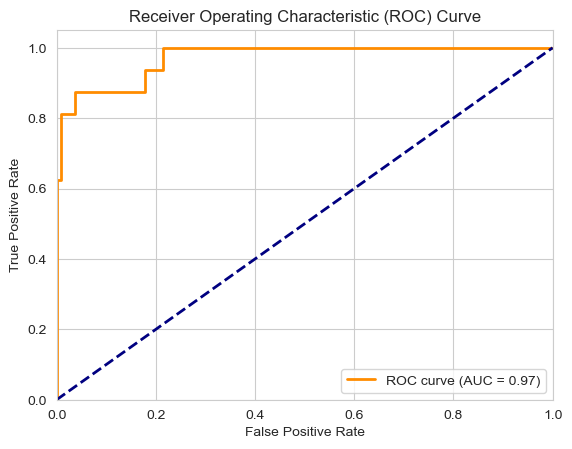

In [511]:
y_prob_svc = random_search_svc.predict_proba(X_test)[:, 1]
# Calculate ROC curve
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_prob_svc)

roc_auc_svc = auc(fpr_svc, tpr_svc)

# Plot ROC curve
plt.figure()
plt.plot(fpr_svc, tpr_svc, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_svc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



In [512]:
print(f"SVC - Accuracy: {accuracy_svc:.4f}, ROC AUC: {roc_auc_svc:.4f}")

SVC - Accuracy: 0.9431, ROC AUC: 0.9714


## **Comparing the model - Siddha**

In [513]:
# Store evaluation metrics for comparison
model_comparison = {
    'Model': ['Random Forest', 'KNN', 'XGBoost', 'Neural Network', 'Gradient Boosting', 'SVC'],
    'Accuracy': [accuracy_rf, accuracy_knn, accuracy_xgb, accuracy_nn, accuracy_gbm, accuracy_svc],
    'ROC AUC': [roc_auc_rf, roc_auc_knn, roc_auc_xgb, roc_auc_nn, roc_auc_gbm, roc_auc_svc]
}

In [514]:
# Create a DataFrame to display comparison
comparison_df = pd.DataFrame(model_comparison)
print(comparison_df.sort_values(by='ROC AUC', ascending=False))

               Model  Accuracy   ROC AUC
5                SVC  0.943089  0.971379
4  Gradient Boosting  0.943089  0.943341
0      Random Forest  0.943089  0.940421
2            XGBoost  0.959350  0.930491
3     Neural Network  0.967480  0.892523
1                KNN  0.934959  0.875000


In [515]:
print(comparison_df.sort_values(by='Accuracy', ascending=False))

               Model  Accuracy   ROC AUC
3     Neural Network  0.967480  0.892523
2            XGBoost  0.959350  0.930491
0      Random Forest  0.943089  0.940421
4  Gradient Boosting  0.943089  0.943341
5                SVC  0.943089  0.971379
1                KNN  0.934959  0.875000


# **Deploying the Best Model**

In [516]:
# As we have identified random_search_nn to be the best model due to its high accurarcy we well now build its multiclass model
# Split data for multiclass classification
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, Y_mc, test_size=0.2, random_state=1234, stratify=Y_mc)

# Instantiate and train multiclass classifier
multiclass_nn = MLPClassifier(max_iter=1000)
multiclass_search_nn = RandomizedSearchCV(estimator=multiclass_nn, param_distributions=param_grid_nn, n_iter=10, cv=5, n_jobs=-1, random_state=42)
multiclass_search_nn.fit(X_train_mc, y_train_mc)

RandomizedSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000), n_jobs=-1,
                   param_distributions={'activation': ['relu', 'tanh'],
                                        'hidden_layer_sizes': [(50,), (100,),
                                                               (100, 50)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['adam', 'sgd']},
                   random_state=42)

In [517]:
# Predicting the probabilities using the multiclass model
y_pred_mc = multiclass_search_nn.predict(X_test_mc)

In [518]:
accuracy_mc_nn = accuracy_score(y_test_mc, y_pred_mc)
roc_auc_mc_nn = roc_auc_score(y_test_mc, multiclass_search_nn.predict_proba(X_test_mc), multi_class='ovr', average='weighted')

In [519]:
print(f"Multiclass Neural Network - Accuracy: {accuracy_mc_nn:.4f}, Multiclass ROC AUC: {roc_auc_mc_nn:.4f}")

Multiclass Neural Network - Accuracy: 0.9106, Multiclass ROC AUC: 0.9723


In [520]:
# Save the binary model
joblib.dump(random_search_nn.best_estimator_, 'Binaryclass_neural_network_model.pkl')

['Binaryclass_neural_network_model.pkl']

In [521]:
# Saving the multiclass model as well
joblib.dump(multiclass_search_nn.best_estimator_, 'multiclass_neural_network_model.pkl')

['multiclass_neural_network_model.pkl']